In [39]:
import pandas as pd

df = pd.read_csv('PSEI.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-01-02,439.529999,439.529999,439.529999,439.529999,439.416992,0.0
1,1987-01-05,455.230011,455.230011,455.230011,455.230011,455.112976,0.0
2,1987-01-06,462.260010,462.260010,462.260010,462.260010,462.141174,0.0
3,1987-01-07,462.500000,462.500000,462.500000,462.500000,462.381104,0.0
4,1987-01-08,483.019989,483.019989,483.019989,483.019989,482.895813,0.0
...,...,...,...,...,...,...,...
9331,2023-05-16,6549.339844,6596.339844,6549.339844,6588.899902,6588.899902,65700.0
9332,2023-05-17,6595.459961,6644.379883,6593.660156,6635.109863,6635.109863,103100.0
9333,2023-05-18,6642.529785,6658.160156,6628.640137,6628.640137,6628.640137,81200.0
9334,2023-05-19,6635.450195,6694.089844,6635.450195,6664.549805,6664.549805,96200.0


In [40]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-01-02,439.529999,439.529999,439.529999,439.529999,439.416992,0.0
1,1987-01-05,455.230011,455.230011,455.230011,455.230011,455.112976,0.0
2,1987-01-06,462.260010,462.260010,462.260010,462.260010,462.141174,0.0
3,1987-01-07,462.500000,462.500000,462.500000,462.500000,462.381104,0.0
4,1987-01-08,483.019989,483.019989,483.019989,483.019989,482.895813,0.0
...,...,...,...,...,...,...,...
9331,2023-05-16,6549.339844,6596.339844,6549.339844,6588.899902,6588.899902,65700.0
9332,2023-05-17,6595.459961,6644.379883,6593.660156,6635.109863,6635.109863,103100.0
9333,2023-05-18,6642.529785,6658.160156,6628.640137,6628.640137,6628.640137,81200.0
9334,2023-05-19,6635.450195,6694.089844,6635.450195,6664.549805,6664.549805,96200.0


In [41]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1987-01-02,439.529999
1,1987-01-05,455.230011
2,1987-01-06,462.260010
3,1987-01-07,462.500000
4,1987-01-08,483.019989
...,...,...
9331,2023-05-16,6588.899902
9332,2023-05-17,6635.109863
9333,2023-05-18,6628.640137
9334,2023-05-19,6664.549805


In [42]:
df['Date']

0       1987-01-02
1       1987-01-05
2       1987-01-06
3       1987-01-07
4       1987-01-08
           ...    
9331    2023-05-16
9332    2023-05-17
9333    2023-05-18
9334    2023-05-19
9335    2023-05-22
Name: Date, Length: 9161, dtype: object

In [43]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1987-01-02')
datetime_object

datetime.datetime(1987, 1, 2, 0, 0)

In [44]:
df

,Date,Close
0,1987-01-02,439.529999
1,1987-01-05,455.230011
2,1987-01-06,462.260010
3,1987-01-07,462.500000
4,1987-01-08,483.019989
...,...,...
9331,2023-05-16,6588.899902
9332,2023-05-17,6635.109863
9333,2023-05-18,6628.640137
9334,2023-05-19,6664.549805


In [45]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1987-01-02
1      1987-01-05
2      1987-01-06
3      1987-01-07
4      1987-01-08
          ...    
9331   2023-05-16
9332   2023-05-17
9333   2023-05-18
9334   2023-05-19
9335   2023-05-22
Name: Date, Length: 9161, dtype: datetime64[ns]

In [46]:
df.index = df.pop('Date')
df

,Close
Date,
1987-01-02,439.529999
1987-01-05,455.230011
1987-01-06,462.260010
1987-01-07,462.500000
1987-01-08,483.019989
...,...
2023-05-16,6588.899902
2023-05-17,6635.109863
2023-05-18,6628.640137


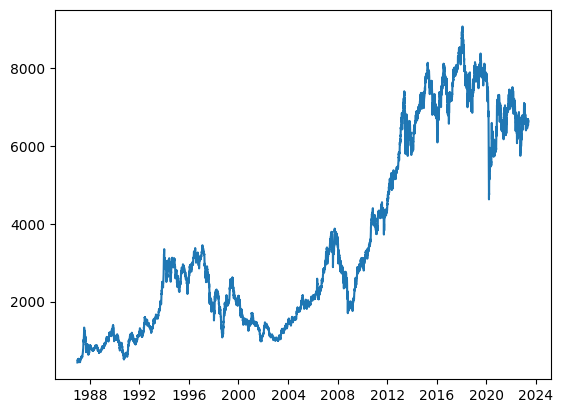

In [47]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [48]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-05-22', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,6395.169922,6446.350098,6497.009766,6581.000000
1,2021-03-26,6446.350098,6497.009766,6581.000000,6544.629883
2,2021-03-29,6497.009766,6581.000000,6544.629883,6607.779785
3,2021-03-30,6581.000000,6544.629883,6607.779785,6545.549805
4,2021-03-31,6544.629883,6607.779785,6545.549805,6443.089844
...,...,...,...,...,...
527,2023-05-16,6675.459961,6578.149902,6523.149902,6588.899902
528,2023-05-17,6578.149902,6523.149902,6588.899902,6635.109863
529,2023-05-18,6523.149902,6588.899902,6635.109863,6628.640137
530,2023-05-19,6588.899902,6635.109863,6628.640137,6664.549805


In [49]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((532,), (532, 3, 1), (532,))

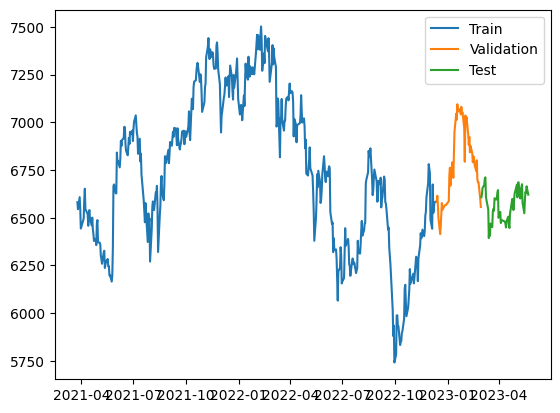

In [50]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
14/14 [==============================] - 4s 71ms/step - loss: 45698816.0000 - mean_absolute_error: 6748.2222 - val_loss: 46139828.0000 - val_mean_absolute_error: 6789.8867
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 45688508.0000 - mean_absolute_error: 6747.4580 - val_loss: 46128484.0000 - val_mean_absolute_error: 6789.0518
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 45675656.0000 - mean_absolute_error: 6746.5078 - val_loss: 46112856.0000 - val_mean_absolute_error: 6787.9004
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 45657432.0000 - mean_absolute_error: 6745.1553 - val_loss: 46090636.0000 - val_mean_absolute_error: 6786.2637
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 45631820.0000 - mean_absolute_error: 6743.2554 - val_loss: 46059960.0000 - val_mean_absolute_error: 6784.0029
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 45596980.00

14/14 [==============================] - 0s 4ms/step


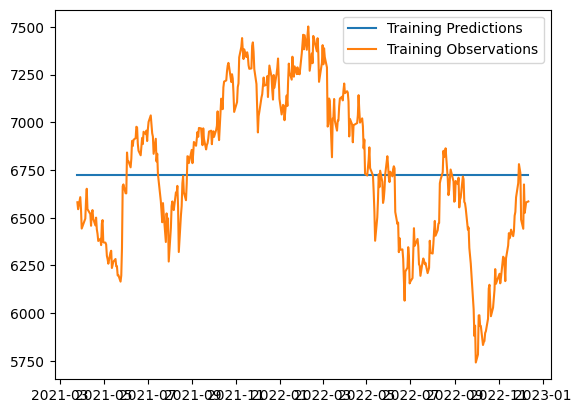

In [56]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [59]:
X_train

array([[[6395.17],
        [6446.35],
        [6497.01]],

       [[6446.35],
        [6497.01],
        [6581.  ]],

       [[6497.01],
        [6581.  ],
        [6544.63]],

       ...,

       [[6489.65],
        [6442.13],
        [6674.38]],

       [[6442.13],
        [6674.38],
        [6525.16]],

       [[6674.38],
        [6525.16],
        [6580.12]]], dtype=float32)